In [58]:
import pandas as pd
import numpy as np

#model selection
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project = 'scarlet-labs'
query = 'select * from `scarlet-labs.basketball.training_2018`'
df = pd.read_gbq(query=query, project_id=project, dialect="standard", verbose=False)

Requesting query... ok.
Query running...
Query done.
Processed: 0.0 b

Retrieving results...
  Got page: 2; 58% done. Elapsed 9.51 s.
  Got page: 3; 87% done. Elapsed 12.35 s.
  Got page: 4; 100% done. Elapsed 13.59 s.
Got 18182 rows.

Total time taken 15.12 s.
Finished at 2018-10-25 16:12:20.


In [3]:
df.head()

,opp,pos,bbrefID,date,player,tm,venue,dk,dk_30d,secs_played_30d,...,opp_orbpct_7d,opp_drbpct_7d,opp_astpct_7d,opp_stlpct_7d,opp_blkpct_7d,opp_tovpct_7d,opp_usgpct_7d,opp_ortg_7d,opp_drtg_7d,opp_gmsc_7d
0,CLE,SG,bacondw01,2018-03-28,Dwayne Bacon,CHO,home,15.75,7.269231,901.076923,...,1.255556,12.844444,11.588889,0.733333,2.422222,6.933333,22.744444,86.333333,117.666667,7.777778
1,PHO,SG,thornsi01,2018-03-28,Sindarius Thornwell,LAC,away,14.75,10.483333,1429.333333,...,5.655556,12.355556,7.900000,1.055556,1.133333,6.537500,15.188889,97.888889,99.555556,5.266667
2,PHO,SG,willilo02,2018-03-28,Lou Williams,LAC,away,15.50,24.343750,2066.937500,...,5.655556,12.355556,7.900000,1.055556,1.133333,6.537500,15.188889,97.888889,99.555556,5.266667
3,PHO,SG,riverau01,2018-03-28,Austin Rivers,LAC,away,29.50,20.390625,2133.562500,...,5.655556,12.355556,7.900000,1.055556,1.133333,6.537500,15.188889,97.888889,99.555556,5.266667
4,PHO,SG,willicj01,2018-03-28,C.J. Williams,LAC,away,5.25,13.250000,1420.500000,...,5.655556,12.355556,7.900000,1.055556,1.133333,6.537500,15.188889,97.888889,99.555556,5.266667


# Model Training

In [13]:
#just select numeric for now. No transforms either.
training = df.select_dtypes([np.number]).dropna()

In [ ]:
#look at correlations
sns.heatmap(training.corr());
plt.show()

In [36]:
#Data selection prep
X = training.drop(["dk"], axis=1)
y = training["dk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
#Basic Linear Model
lm = LinearRegression(normalize=True)
lm.fit(X=X_train, y=y_train)
y_hat = lm.predict(X_test)
feature_importances = dict(zip(X_train.columns, lm.coef_))

In [42]:
#did we overfit?
{"actual":sqrt(mean_squared_error(y_pred=y_hat, y_true=y_test)), 
 "training":sqrt(mean_squared_error(y_pred=lm.predict(X_train), y_true=y_train))}

{'actual': 6.90489057811041, 'training': 6.9036834873148285}

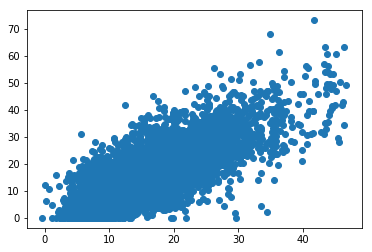

In [39]:
#Accuracy
plt.scatter(y_hat, y_test)
plt.show()